# **Importing Libraries and Dataset**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


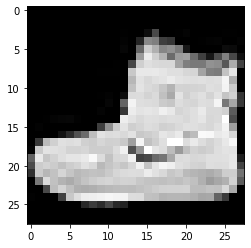

In [ ]:
plt.imshow(X_train[0], cmap = "gray")

In [5]:
X_train.shape

(60000, 28, 28)

# **Data Visualization**

0

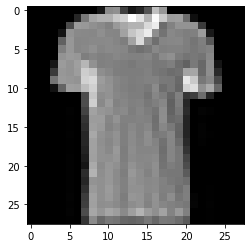

In [ ]:
i = random.randint(1, 60000) 
plt.imshow(X_train[i] , cmap = 'gray') 

label = y_train[i]
label

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() 

n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_training)
        
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

# **Data Pre-processing**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
noise_factor = 0.3

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

In [ ]:
noise_test_dataset = []

for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_dataset.append(noisy_image)
  

In [ ]:
noise_dataset = np.array(noise_dataset)
noise_test_dataset = np.array(noise_test_dataset)

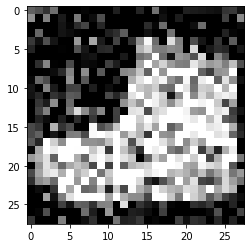

In [ ]:
plt.imshow(noise_dataset[0], cmap = "gray")

# **Building and Training the Model**

In [ ]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = "same", input_shape = (28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = "same"))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = "same"))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = "same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = "same"))

In [ ]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),          
                X_train.reshape(-1, 28, 28, 1), 
                epochs = 10, 
                batch_size = 200, 
                validation_data=(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 15s 51ms/step - loss: 0.3991 - val_loss: 0.3267
Epoch 2/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3173 - val_loss: 0.3144
Epoch 3/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3095 - val_loss: 0.3096
Epoch 4/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3062 - val_loss: 0.3075
Epoch 5/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3045 - val_loss: 0.3061
Epoch 6/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3033 - val_loss: 0.3049
Epoch 7/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3023 - val_loss: 0.3041
Epoch 8/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3016 - val_loss: 0.3037
Epoch 9/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3010 - val_loss: 0.3030
Epoch 10/10
300/300 [==============================] - 15s 50ms/step - loss: 0.300

# **Model Evaluation**

In [ ]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Accuracy : {:.3f}'.format(evaluation))

313/313 [==============================] - 2s 5ms/step - loss: 0.3027
Test Accuracy : 0.303


In [ ]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))
m = tf.keras.metrics.Accuracy(name = "accuracy", dtype = None)

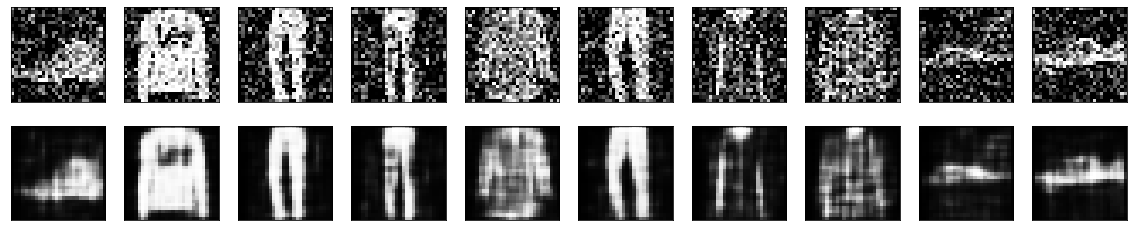

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, sharex = True, sharey = True, figsize = (20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)